In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import warnings;

# Loading the Dataset

In [3]:
data = sns.load_dataset("Titanic")

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### As part of the whole analysis we are going through the following steps:
     1- Manipulating column names
     2- Dropping extra columns
     3- Dropping Outlier
     3- Replacing values 
     4- Handling Null Values
     5- Analysis
     

# Manipulating Column Names

In [5]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
mapping = {
    "who":"individual_type",
    "sex":"gender",
    "alive":"survival_status",
    "sibsp":"sibling/spouse",
    "pclass":"passenger_class",
    "parch": "parent/children"
}

In [7]:
data.rename(mapping,axis = 1,inplace = True)

In [8]:
data.head()

,survived,passenger_class,gender,age,sibling/spouse,parent/children,fare,embarked,class,individual_type,adult_male,deck,embark_town,survival_status,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Dropping Extra Columns

        1-embarked is similar to embarked_town
        2-survived is similar to survival status
        3-Class is similar to passenger class

In [9]:
data.drop(["survived","embarked","class"],axis =1,inplace = True)

In [10]:
data.head()

,passenger_class,gender,age,sibling/spouse,parent/children,fare,individual_type,adult_male,deck,embark_town,survival_status,alone
0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,no,True


# Dropping duplicates

In [11]:
data = data.drop_duplicates()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_class  784 non-null    int64  
 1   gender           784 non-null    object 
 2   age              678 non-null    float64
 3   sibling/spouse   784 non-null    int64  
 4   parent/children  784 non-null    int64  
 5   fare             784 non-null    float64
 6   individual_type  784 non-null    object 
 7   adult_male       784 non-null    bool   
 8   deck             202 non-null    object 
 9   embark_town      782 non-null    object 
 10  survival_status  784 non-null    object 
 11  alone            784 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 68.9+ KB


# Removing Outlier

In [13]:
data.describe()

,passenger_class,age,sibling/spouse,parent/children,fare
count,784.000000,678.000000,784.000000,784.000000,784.000000
mean,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.855056,14.759076,0.986231,0.836922,52.160151
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,0.000000,8.050000
50%,3.000000,28.250000,0.000000,0.000000,15.900000
75%,3.000000,39.000000,1.000000,1.000000,34.109350
max,3.000000,80.000000,8.000000,6.000000,512.329200


-----
The max value of fare is way too greater than the max value.

In [14]:
data = data[data["fare"] != 512.329200]

In [15]:
data.describe()

,passenger_class,age,sibling/spouse,parent/children,fare
count,781.000000,675.000000,781.000000,781.000000,781.000000
mean,2.248399,29.845067,0.524968,0.416133,32.877102
std,0.853207,14.787341,0.987592,0.838005,43.016238
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,0.000000,8.050000
50%,3.000000,28.000000,0.000000,0.000000,15.850000
75%,3.000000,39.000000,1.000000,1.000000,33.000000
max,3.000000,80.000000,8.000000,6.000000,263.000000


# Replacing Values

In [16]:
data["alone"] = data["alone"].replace({True:"yes",False:"no"})

In [17]:
data["adult_male"] = data["adult_male"].replace({True:"yes",False:"no"})

In [18]:
data.head()

,passenger_class,gender,age,sibling/spouse,parent/children,fare,individual_type,adult_male,deck,embark_town,survival_status,alone
0,3,male,22.0,1,0,7.2500,man,yes,NaN,Southampton,no,no
1,1,female,38.0,1,0,71.2833,woman,no,C,Cherbourg,yes,no
2,3,female,26.0,0,0,7.9250,woman,no,NaN,Southampton,yes,yes
3,1,female,35.0,1,0,53.1000,woman,no,C,Southampton,yes,no
4,3,male,35.0,0,0,8.0500,man,yes,NaN,Southampton,no,yes


# Handling Null Values

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_class  781 non-null    int64  
 1   gender           781 non-null    object 
 2   age              675 non-null    float64
 3   sibling/spouse   781 non-null    int64  
 4   parent/children  781 non-null    int64  
 5   fare             781 non-null    float64
 6   individual_type  781 non-null    object 
 7   adult_male       781 non-null    object 
 8   deck             200 non-null    object 
 9   embark_town      779 non-null    object 
 10  survival_status  781 non-null    object 
 11  alone            781 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 79.3+ KB


------
    1-deck
    2-age
    3-embark_town

## 1- Deck

**Though deck has a lot of null values and normally such type of column is removed but it has a really important role in     analysis. Furthermore, there are various factors in dataset that can help us determine the deck.**

**Based on additional information gained, the people on each deck belong to different classes yet they have segregations and different provided facilities.**

In [20]:
data["deck"].value_counts()

deck
C    59
B    44
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

-----
A lot of people in deck C

### Checking the relationship of deck with fare and passenger class
The reason for considering both factors is what I have mentioned above: there are people of all classes on each deck thus paying fares based on classes. In order to find the most probable deck we can't depend on any one factor.
There are different passenger classes on each deck and all the classes within each deck may be paying different fares.
For example, the first class passengers on deck B might be paying less fare on deck C.

C:\Users\Imran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


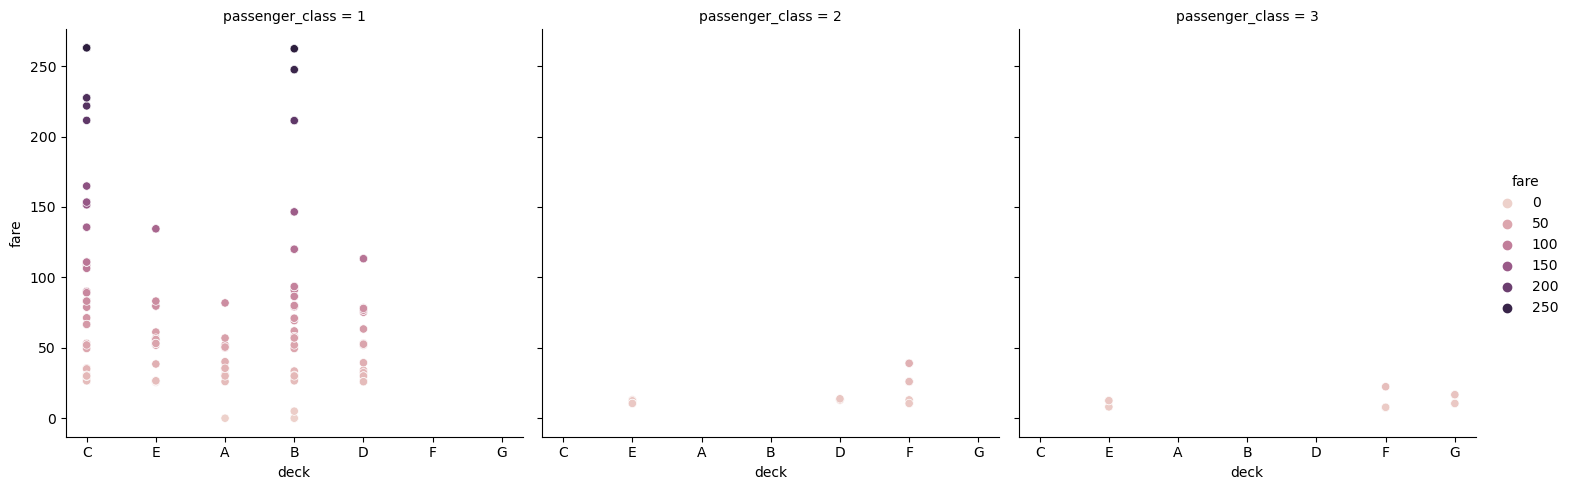

In [27]:
sns.relplot(data,x = "deck",y = "fare",col="passenger_class",hue = "fare");

------
Deck C and B have higher fares for first class passengers

------
The problem is that we need numerics to find the null values

### Checking for the mean and median of fares for each deck

In [28]:
agg_results = data.groupby(['passenger_class', 'deck'])['fare'].agg(['mean', 'median','max','min']).round().reset_index()

In [29]:
agg_results

,passenger_class,deck,mean,median,max,min
0,1,A,40.0,36.0,82.0,0.0
1,1,B,96.0,80.0,262.0,0.0
2,1,C,100.0,83.0,263.0,27.0
3,1,D,63.0,75.0,113.0,26.0
4,1,E,56.0,55.0,134.0,26.0
5,2,D,13.0,13.0,14.0,13.0
6,2,E,12.0,11.0,13.0,10.0
7,2,F,24.0,26.0,39.0,10.0
8,3,E,11.0,12.0,12.0,8.0
9,3,F,11.0,8.0,22.0,8.0


---------
Since mean and median do not have a large differences, we can use mean for analysis

In [30]:
agg_results.drop("median",axis = 1,inplace = True)

In [31]:
pivot_results = agg_results.pivot_table(index='deck', columns='passenger_class', values=['mean','max','min'])

In [32]:
pivot_results

max               mean               min            
passenger_class      1     2     3      1     2     3     1     2     3
deck                                                                   
A                 82.0   NaN   NaN   40.0   NaN   NaN   0.0   NaN   NaN
B                262.0   NaN   NaN   96.0   NaN   NaN   0.0   NaN   NaN
C                263.0   NaN   NaN  100.0   NaN   NaN  27.0   NaN   NaN
D                113.0  14.0   NaN   63.0  13.0   NaN  26.0  13.0   NaN
E                134.0  13.0  12.0   56.0  12.0  11.0  26.0  10.0   8.0
F                  NaN  39.0  22.0    NaN  24.0  11.0   NaN  10.0   8.0
G                  NaN   NaN  17.0    NaN   NaN  14.0   NaN   NaN  10.0

----
As first class pay pretty huge fairs we are not going to consider minimum fares for them

    if fare is between(82  and 40)--> A for pclass 1
    if fare is between(262 and 96)--> B for pclass 1
    if fare is between(263 and 100)-> C for pclass 1
    if fare is between(113 and 26)--> D for pclass 1
    if fare is between(134 and 26)--> E for pclass 1
    if fare is between(14  and 13)--> D for pclass 2
    if fare is between(13  and 10)--> E for pclass 2
    if fare is between(39  and 10)--> F for pclass 2
    if fare is between(12  and 8)---> E for pclass 3
    if fare is between(22  and 8)---> F for pclass 3
    if fare is between(17  and 10)--> G for pclass 3

In [33]:
data.loc[(data["passenger_class"] == 1) & ((data["fare"] >= 40) | (data["fare"] <= 82)),"fare_range"]= "A"

In [34]:
data.loc[(data["passenger_class"] == 1) & ((data["fare"] >= 96) | (data["fare"] <= 262)),"fare_range"]= "B"

In [35]:
data.loc[(data["passenger_class"] == 1) & (data["fare"] >= 263) ,"fare_range"]= "C"

In [36]:
data.loc[(data['passenger_class'] == 1) & (data['fare'] < 40), 'fare_range'] = 'D'

In [37]:
data.loc[(data["passenger_class"] == 2) & ((data["fare"] > 13)),"fare_range"] = "F"

In [38]:
data.loc[(data["passenger_class"] == 2) & ((data["fare"] >= 13) & (data["fare"] <= 14)),"fare_range"] = "D"

In [39]:
data.loc[(data["passenger_class"] == 2) & (data["fare"] <13),"fare_range"] = "E"

In [40]:
data.loc[(data["passenger_class"] == 3) & (data["fare"] >=22),"fare_range"] = "E"

In [41]:
data.loc[(data["passenger_class"] == 3) & ((data["fare"] >=8) & data["fare"] <= 12),"fare_range"] = "F"

In [42]:
data.loc[(data["passenger_class"] == 3) & (data["fare"] < 8 ),"fare_range"] = "G"

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_class  781 non-null    int64  
 1   gender           781 non-null    object 
 2   age              675 non-null    float64
 3   sibling/spouse   781 non-null    int64  
 4   parent/children  781 non-null    int64  
 5   fare             781 non-null    float64
 6   individual_type  781 non-null    object 
 7   adult_male       781 non-null    object 
 8   deck             200 non-null    object 
 9   embark_town      779 non-null    object 
 10  survival_status  781 non-null    object 
 11  alone            781 non-null    object 
 12  fare_range       781 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 85.4+ KB


C:\Users\Imran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


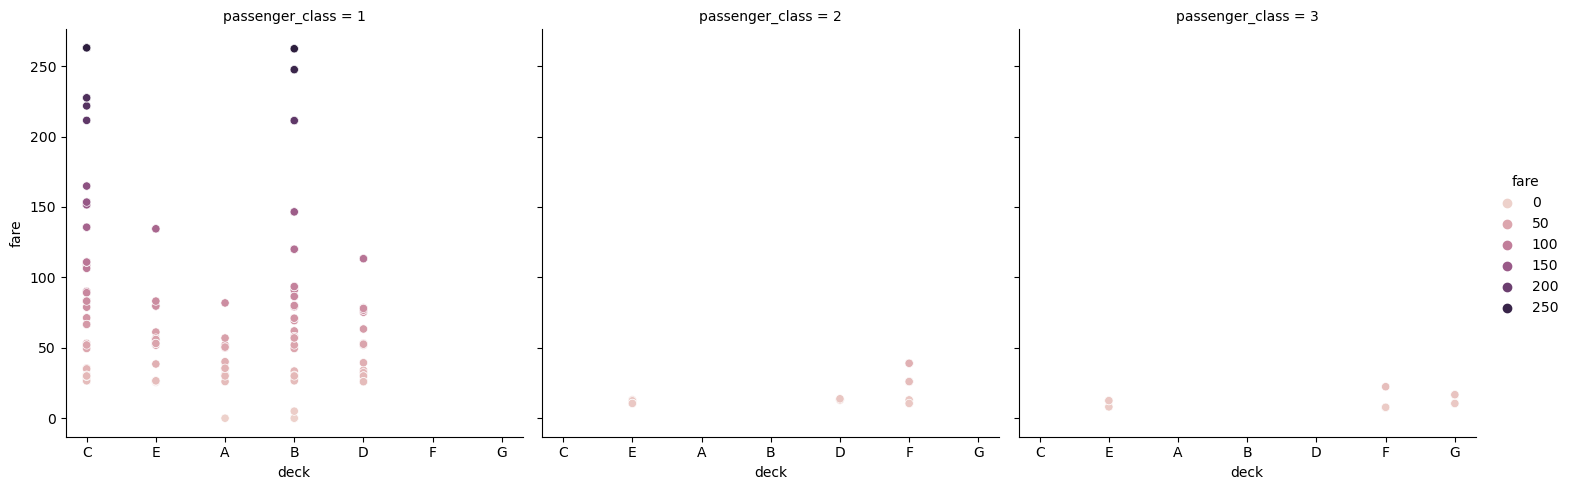

In [45]:
sns.relplot(data,x = "deck",y = "fare",col="passenger_class",hue = "fare");

-----------
Only the values have increased for each deck but the overall trend is same.

### Filling null values of deck with corresponding values of fare_range

In [46]:
data["deck"]=data["deck"].fillna(data["fare_range"])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_class  781 non-null    int64  
 1   gender           781 non-null    object 
 2   age              675 non-null    float64
 3   sibling/spouse   781 non-null    int64  
 4   parent/children  781 non-null    int64  
 5   fare             781 non-null    float64
 6   individual_type  781 non-null    object 
 7   adult_male       781 non-null    object 
 8   deck             781 non-null    object 
 9   embark_town      779 non-null    object 
 10  survival_status  781 non-null    object 
 11  alone            781 non-null    object 
 12  fare_range       781 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 85.4+ KB


### Dropping fare_range

In [48]:
data.drop("fare_range",axis =1,inplace = True)

In [49]:
data.head()

,passenger_class,gender,age,sibling/spouse,parent/children,fare,individual_type,adult_male,deck,embark_town,survival_status,alone
0,3,male,22.0,1,0,7.2500,man,yes,G,Southampton,no,no
1,1,female,38.0,1,0,71.2833,woman,no,C,Cherbourg,yes,no
2,3,female,26.0,0,0,7.9250,woman,no,G,Southampton,yes,yes
3,1,female,35.0,1,0,53.1000,woman,no,C,Southampton,yes,no
4,3,male,35.0,0,0,8.0500,man,yes,F,Southampton,no,yes


## 2-Age


### Using adult_male column to find null ages

In [50]:
data["adult_male"][(data["age"] >= 18) & (data["gender"] == "male")].value_counts() #CHECKING THE AUTHENTICITY OF COLUMN

adult_male
yes    364
Name: count, dtype: int64

In [51]:
round(np.mean(data["age"][(data["age"] >= 18) & (data["gender"] == "male")]))

34

In [52]:
round(np.mean(data["age"][(data["age"] < 18) & (data["gender"] == "male")]))

9

In [53]:
round(np.mean(data["age"][(data["age"] < 18) & (data["gender"] == "female")]))

9

In [54]:
round(np.mean(data["age"][(data["age"] >= 18) & (data["gender"] == "female")]))

33

In [55]:
data.loc[(data["adult_male"] == "yes"),"adult_range"] = 34

In [56]:
data.loc[data["adult_male"] == "no","adult_range"] = 9

In [57]:
data.loc[(data["adult_male"] == "no") & (data["age"] >=18),"adult_range"] = 33

In [58]:
data["adult_range"].value_counts()

adult_range
34.0    449
33.0    201
9.0     131
Name: count, dtype: int64

In [59]:
data["age"]=data["age"].fillna(data["adult_range"])

### Dropping adult_range

In [60]:
data.drop("adult_range",axis =1,inplace = True)

In [61]:
data.head()

,passenger_class,gender,age,sibling/spouse,parent/children,fare,individual_type,adult_male,deck,embark_town,survival_status,alone
0,3,male,22.0,1,0,7.2500,man,yes,G,Southampton,no,no
1,1,female,38.0,1,0,71.2833,woman,no,C,Cherbourg,yes,no
2,3,female,26.0,0,0,7.9250,woman,no,G,Southampton,yes,yes
3,1,female,35.0,1,0,53.1000,woman,no,C,Southampton,yes,no
4,3,male,35.0,0,0,8.0500,man,yes,F,Southampton,no,yes


## 3-Embarked_town

In [62]:
data[data["embark_town"].isnull()]

,passenger_class,gender,age,sibling/spouse,parent/children,fare,individual_type,adult_male,deck,embark_town,survival_status,alone
61,1,female,38.0,0,0,80.0,woman,no,B,NaN,yes,yes
829,1,female,62.0,0,0,80.0,woman,no,B,NaN,yes,yes


In [63]:
embark_null = data[(data["passenger_class"]==1) & (data["gender"] == "female") & (data["sibling/spouse"] == 0) & (data["deck"] == "B") & (data["survival_status"] == "yes") & (data["alone"] == "yes")]
embark_null

,passenger_class,gender,age,sibling/spouse,parent/children,fare,individual_type,adult_male,deck,embark_town,survival_status,alone
61,1,female,38.0,0,0,80.0000,woman,no,B,NaN,yes,yes
194,1,female,44.0,0,0,27.7208,woman,no,B,Cherbourg,yes,yes
195,1,female,58.0,0,0,146.5208,woman,no,B,Cherbourg,yes,yes
256,1,female,9.0,0,0,79.2000,woman,no,B,Cherbourg,yes,yes
257,1,female,30.0,0,0,86.5000,woman,no,B,Southampton,yes,yes
290,1,female,26.0,0,0,78.8500,woman,no,B,Southampton,yes,yes
306,1,female,9.0,0,0,110.8833,woman,no,B,Cherbourg,yes,yes
369,1,female,24.0,0,0,69.3000,woman,no,B,Cherbourg,yes,yes
380,1,female,42.0,0,0,227.5250,woman,no,B,Cherbourg,yes,yes
504,1,female,16.0,0,0,86.5000,woman,no,B,Southampton,yes,yes


In [64]:
embark_null["embark_town"].value_counts()

embark_town
Southampton    8
Cherbourg      7
Name: count, dtype: int64

In [67]:
data.embark_town.fillna("Southampton",inplace = True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_class  781 non-null    int64  
 1   gender           781 non-null    object 
 2   age              781 non-null    float64
 3   sibling/spouse   781 non-null    int64  
 4   parent/children  781 non-null    int64  
 5   fare             781 non-null    float64
 6   individual_type  781 non-null    object 
 7   adult_male       781 non-null    object 
 8   deck             781 non-null    object 
 9   embark_town      781 non-null    object 
 10  survival_status  781 non-null    object 
 11  alone            781 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 79.3+ KB


# Analysis

## 1- Analyzing Survival status

<Axes: xlabel='survival_status', ylabel='count'>

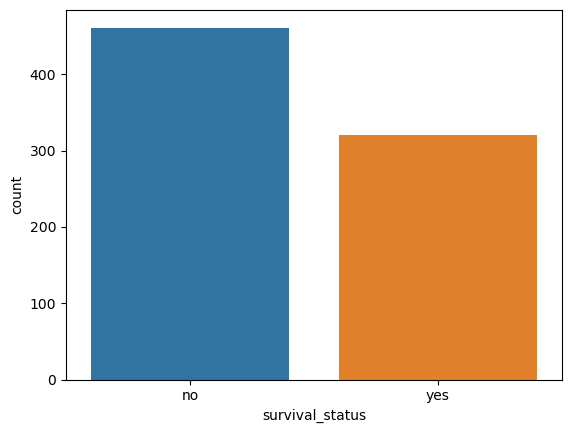

In [69]:
sns.countplot(data,x = "survival_status")

In [70]:
data["survival_status"].value_counts(normalize = True)*100

survival_status
no     59.026889
yes    40.973111
Name: proportion, dtype: float64

Around 59% people died, lets look deeper into categories

## 2- Survival as per gender

<Axes: xlabel='survival_status', ylabel='count'>

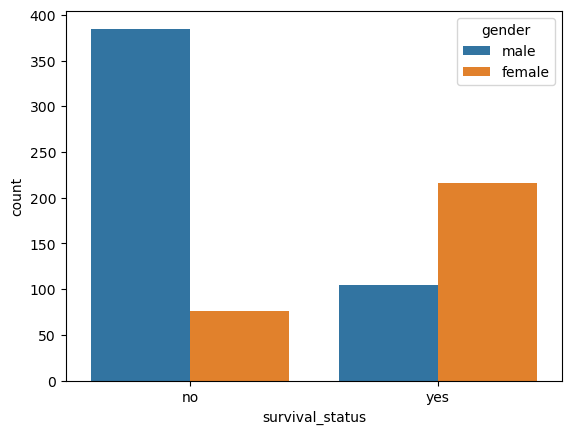

In [71]:
sns.countplot(data,x = "survival_status", hue = "gender")

In [72]:
data["survival_status"][data["gender"] == "male"].value_counts(normalize = True)*100

survival_status
no     78.732106
yes    21.267894
Name: proportion, dtype: float64

Out of all the people survived, only 21% were males 

In [73]:
data["survival_status"][data["gender"] == "female"].value_counts(normalize = True)*100

survival_status
yes    73.972603
no     26.027397
Name: proportion, dtype: float64

Out of all the people survived, 74% were females

## 3- Survival as per Individual type

<Axes: xlabel='survival_status', ylabel='count'>

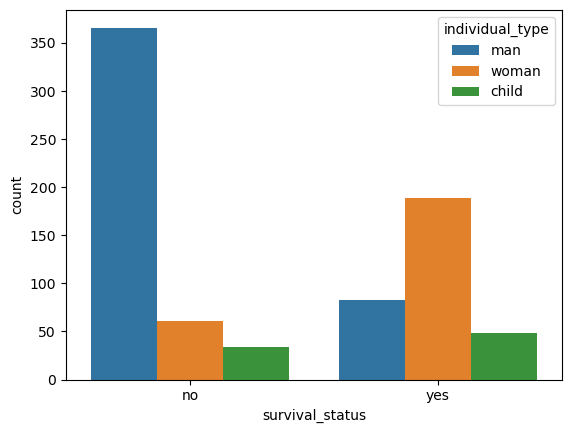

In [74]:
sns.countplot(data,x = "survival_status", hue = "individual_type")

In [75]:
round(data["survival_status"][data["individual_type"] == "woman"].value_counts(normalize = True)*100)

survival_status
yes    76.0
no     24.0
Name: proportion, dtype: float64

In [76]:
round(data["survival_status"][data["individual_type"] == "man"].value_counts(normalize = True)*100)

survival_status
no     82.0
yes    18.0
Name: proportion, dtype: float64

In [77]:
round(data["survival_status"][data["individual_type"] == "child"].value_counts(normalize = True)*100)

survival_status
yes    59.0
no     41.0
Name: proportion, dtype: float64

Out of all individual types females have a good survival ratio

## 4- Finding the safest deck

<Axes: xlabel='survival_status', ylabel='count'>

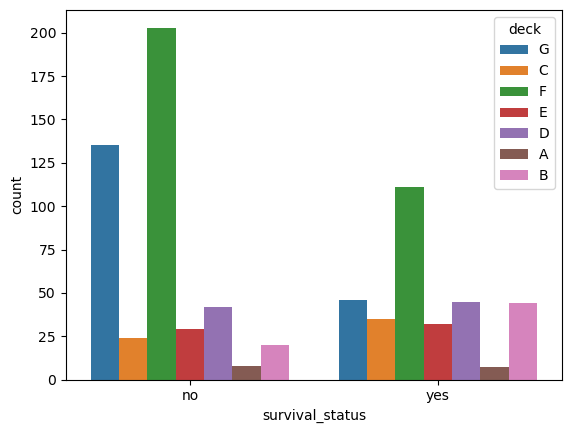

In [78]:
sns.countplot(data,x = "survival_status", hue = "deck") 

In [79]:
round(data["survival_status"][data["deck"] == "A"].value_counts(normalize = True)*100)

survival_status
no     53.0
yes    47.0
Name: proportion, dtype: float64

In [80]:
round(data["survival_status"][data["deck"] == "B"].value_counts(normalize = True)*100)

survival_status
yes    69.0
no     31.0
Name: proportion, dtype: float64

In [81]:
round(data["survival_status"][data["deck"] == "C"].value_counts(normalize = True)*100)

survival_status
yes    59.0
no     41.0
Name: proportion, dtype: float64

In [82]:
round(data["survival_status"][data["deck"] == "D"].value_counts(normalize = True)*100)

survival_status
yes    52.0
no     48.0
Name: proportion, dtype: float64

In [83]:
round(data["survival_status"][data["deck"] == "E"].value_counts(normalize = True)*100)

survival_status
yes    52.0
no     48.0
Name: proportion, dtype: float64

In [84]:
round(data["survival_status"][data["deck"] == "F"].value_counts(normalize = True)*100)

survival_status
no     65.0
yes    35.0
Name: proportion, dtype: float64

In [85]:
round(data["survival_status"][data["deck"] == "G"].value_counts(normalize = True)*100)

survival_status
no     75.0
yes    25.0
Name: proportion, dtype: float64

B is the safest deck and G is the most dangerous one

## 5- Survival as per Passenger Class

<Axes: xlabel='survival_status', ylabel='count'>

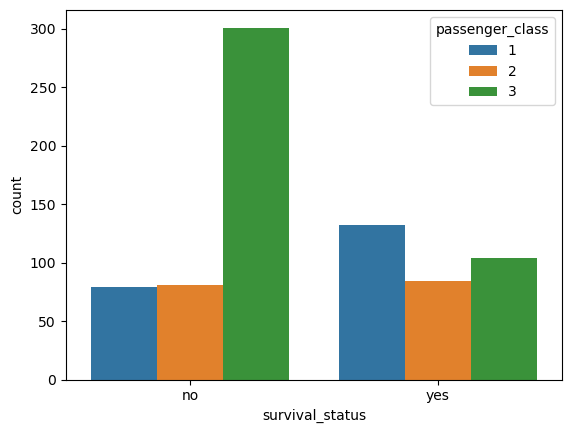

In [86]:
sns.countplot(data,x = "survival_status", hue = "passenger_class")

In [87]:
data["passenger_class"].value_counts()

passenger_class
3    405
1    211
2    165
Name: count, dtype: int64

Majority of people on board are 3rd class

In [88]:
round(data["survival_status"][data["passenger_class"] == 1].value_counts(normalize = True)*100)

survival_status
yes    63.0
no     37.0
Name: proportion, dtype: float64

In [89]:
round(data["survival_status"][data["passenger_class"] == 2].value_counts(normalize = True)*100)

survival_status
yes    51.0
no     49.0
Name: proportion, dtype: float64

In [90]:
round(data["survival_status"][data["passenger_class"] == 3].value_counts(normalize = True)*100)

survival_status
no     74.0
yes    26.0
Name: proportion, dtype: float64

First class passengers survived the most.

## 6- Survival status of people alone vs with family

<Axes: xlabel='survival_status', ylabel='count'>

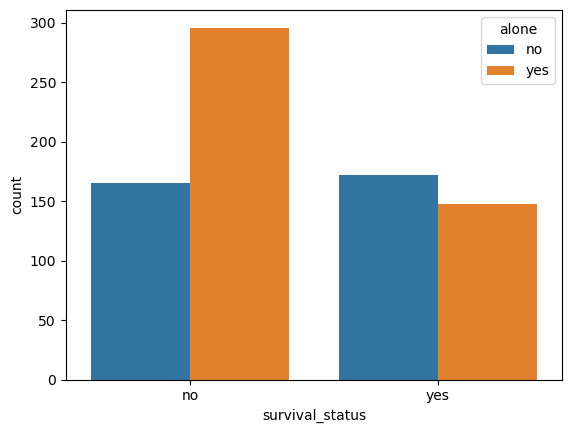

In [91]:
sns.countplot(data,x = "survival_status", hue = "alone")

In [92]:
round(data["survival_status"][data["alone"] == "yes"].value_counts(normalize = True)*100)

survival_status
no     67.0
yes    33.0
Name: proportion, dtype: float64

In [93]:
round(data["survival_status"][data["alone"] == "no"].value_counts(normalize = True)*100)

survival_status
yes    51.0
no     49.0
Name: proportion, dtype: float64

People with family were more likely to survive

## 7- Survival Status as per Adults

In [94]:
adult = []
for i in data.age:
    if i < 18:
        adult.append("no")
    else:
        adult.append("yes")

In [95]:
data["adult"] = adult

<Axes: xlabel='survival_status', ylabel='count'>

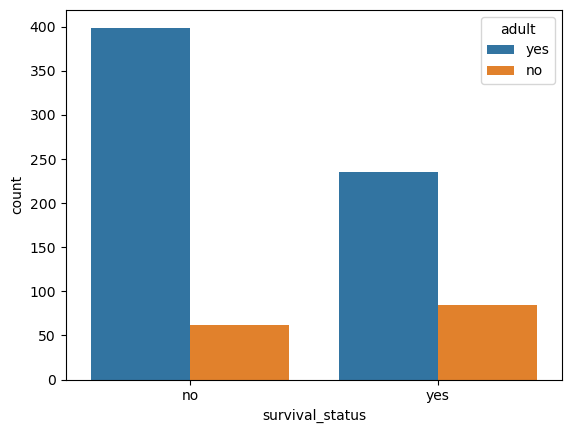

In [96]:
sns.countplot(data,x = "survival_status", hue = "adult")

Kids have larger survival ratio

<Axes: xlabel='survival_status', ylabel='count'>

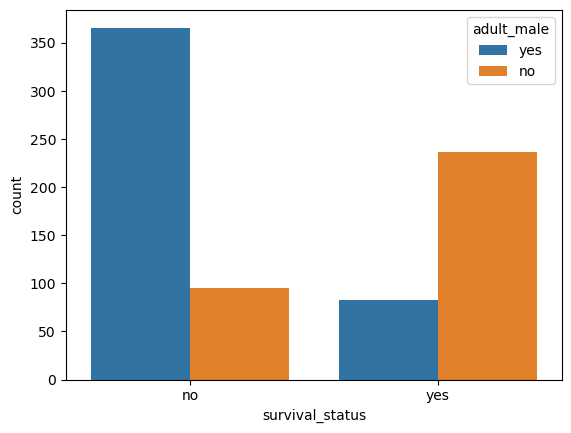

In [97]:
sns.countplot(data,x = "survival_status", hue = "adult_male")

In [98]:
round(data["survival_status"][data["adult_male"] == "yes"].value_counts(normalize = True)*100)

survival_status
no     82.0
yes    18.0
Name: proportion, dtype: float64

Only 18% adult males survived

## 8- Category on the basis of fare

In [99]:
def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    outlier = []
    for i in data:
        z_score = (i-mean)/std
        if abs(z_score) > 3:
            outlier.append(i)
    return outlier  

In [100]:
large_fares = detect_outliers(data.fare)

In [101]:
data[["passenger_class","deck","fare"]][data["fare"].isin(large_fares)]

,passenger_class,deck,fare
27,1,C,263.0000
88,1,C,263.0000
118,1,B,247.5208
299,1,B,247.5208
311,1,B,262.3750
318,1,C,164.8667
341,1,C,263.0000
377,1,C,211.5000
380,1,B,227.5250
438,1,C,263.0000


All of them belong to the first passenger class and the best decks. 

In [102]:
data.fare.value_counts(bins = 3)

(-0.264, 87.667]     721
(87.667, 175.333]     43
(175.333, 263.0]      17
Name: count, dtype: int64

In [103]:
data["fare_category"] = pd.cut(data.fare,bins = 3,labels = ["Inexpensive","Reasonable","Expensive"])

In [104]:
if 'No Fare' not in data['fare_category'].cat.categories:
    data['fare_category'] = data['fare_category'].cat.add_categories('No Fare')
data.loc[data["fare"] == 0, "fare_category"] = "No Fare"
data["fare_category"].value_counts()

fare_category
Inexpensive    711
Reasonable      43
Expensive       17
No Fare         10
Name: count, dtype: int64

In [105]:
data.head()

,passenger_class,gender,age,sibling/spouse,parent/children,fare,individual_type,adult_male,deck,embark_town,survival_status,alone,adult,fare_category
0,3,male,22.0,1,0,7.2500,man,yes,G,Southampton,no,no,yes,Inexpensive
1,1,female,38.0,1,0,71.2833,woman,no,C,Cherbourg,yes,no,yes,Inexpensive
2,3,female,26.0,0,0,7.9250,woman,no,G,Southampton,yes,yes,yes,Inexpensive
3,1,female,35.0,1,0,53.1000,woman,no,C,Southampton,yes,no,yes,Inexpensive
4,3,male,35.0,0,0,8.0500,man,yes,F,Southampton,no,yes,yes,Inexpensive


<Axes: xlabel='survival_status', ylabel='count'>

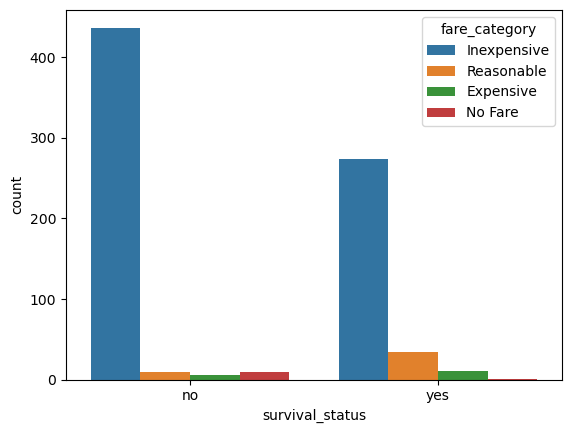

In [106]:
sns.countplot(data,x = "survival_status", hue = "fare_category") # more inexpensive ones are on board

This supports the conclusion that a lot of poeple are from 3rd class 

C:\Users\Imran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


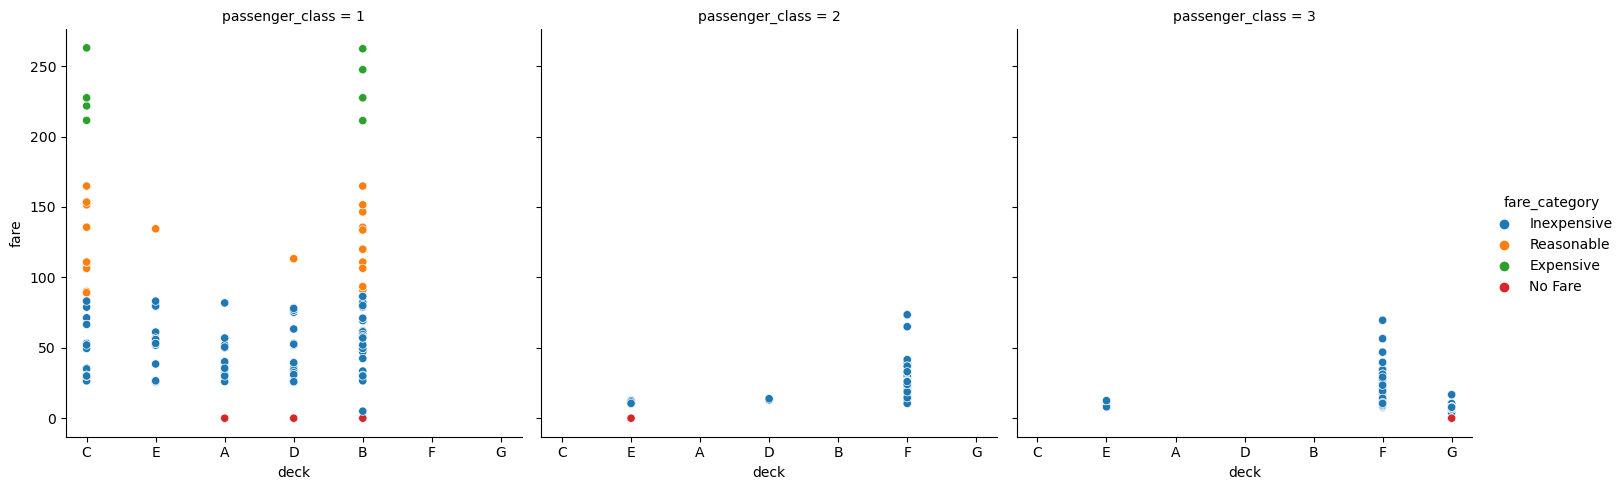

In [107]:
sns.relplot(data,x = "deck",y="fare",col = "passenger_class",hue = "fare_category");

Some first class people are also on board for free

## 9- Survival Status as per embarked town

<Axes: xlabel='survival_status', ylabel='count'>

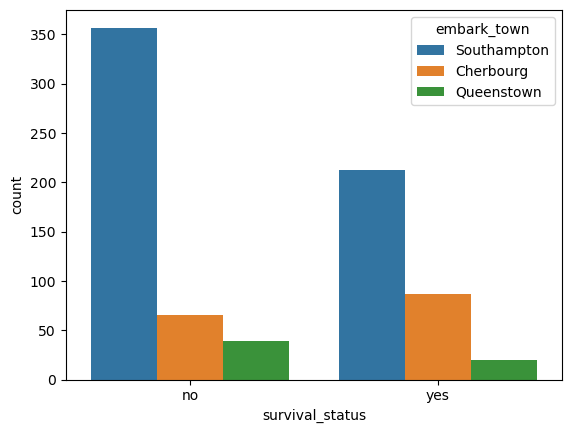

In [108]:
sns.countplot(data,x = "survival_status", hue = "embark_town") 

The survival to death ratio is greatest for Cherbourg which lead us to hypothesize that the people from there may have a good lifestyle and paid huge fairs

C:\Users\Imran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Imran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Imran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


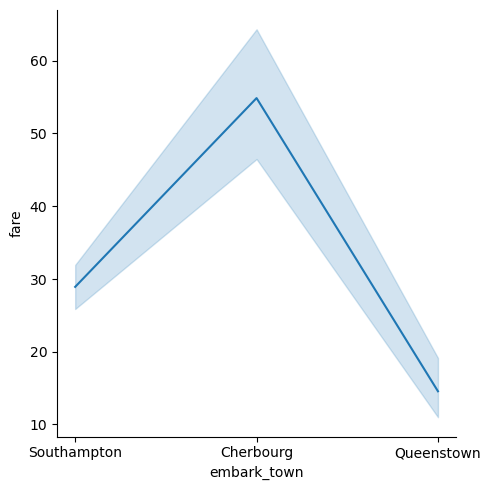

In [112]:
sns.relplot(data,x="embark_town",y="fare",kind="line");

This trend supports the hypothesis

<Axes: xlabel='passenger_class', ylabel='count'>

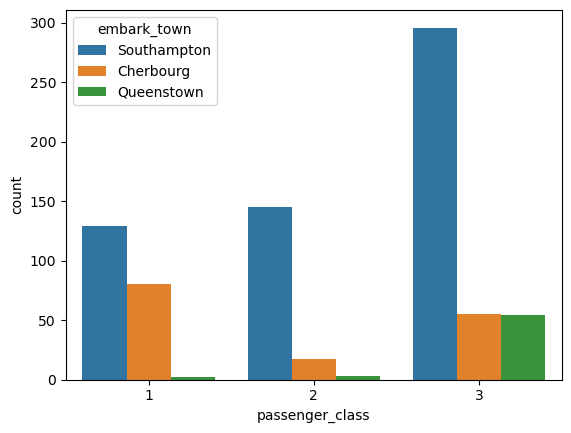

In [113]:
sns.countplot(data,x = "passenger_class", hue = "embark_town") 

Most of them belong to first class 

## 10 -Box plots identify the outliers based on interquartile range


<Axes: >

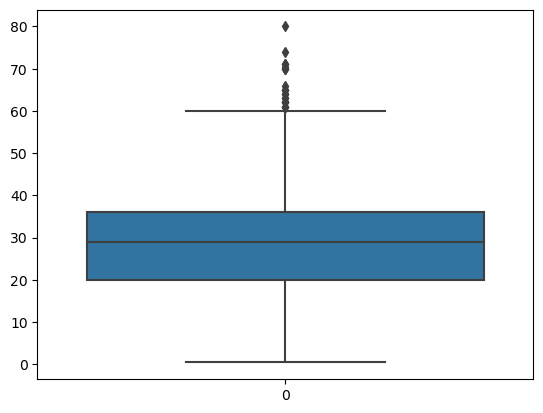

In [114]:
sns.boxplot(data["age"])

In [115]:
outlier_age = detect_outliers(data.age)

In [116]:
data[data.age.isin(outlier_age)] 

,passenger_class,gender,age,sibling/spouse,parent/children,fare,individual_type,adult_male,deck,embark_town,survival_status,alone,adult,fare_category
630,1,male,80.0,0,0,30.000,man,yes,A,Southampton,yes,yes,yes,Inexpensive
851,3,male,74.0,0,0,7.775,man,yes,G,Southampton,no,yes,yes,Inexpensive


The 80 year man is the eldest to survive.

# 11- Standard Deviation

In [117]:
np.std(data["age"]) # People of different ages are on board 

14.506308001642848

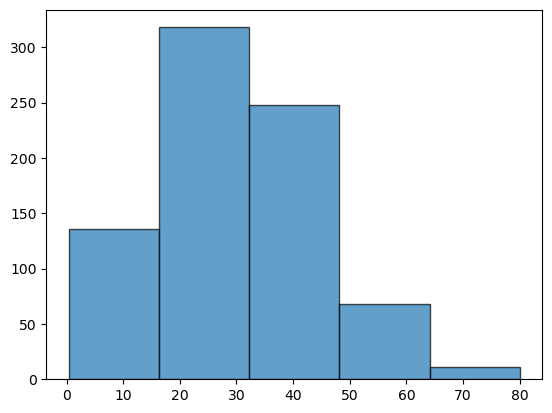

In [118]:
plt.hist(x = data["age"], bins=5, edgecolor="k", alpha=0.7);

A lot of people are between the ages of 15 and 35.
Meanwhile, there are a wide variety of people

In [119]:
np.std(data["fare"])

42.98868972857173

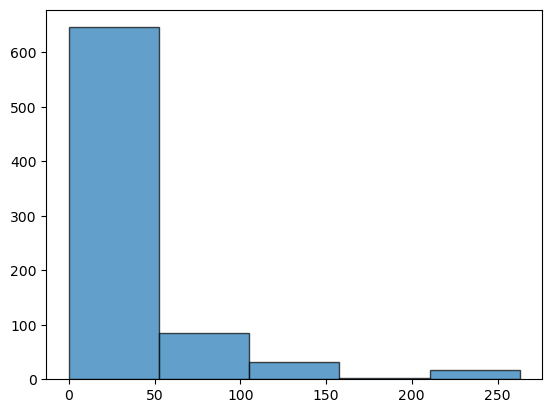

In [120]:
plt.hist(x = data["fare"], bins=5, edgecolor="k", alpha=0.7);

Most people on board have paid less fares 